# Analysis of corpus files

## Import directives

In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

## Common components

In [2]:
class Corpus:
    def __init__(self, corpus_dir):
        self._corpus_dir = corpus_dir

    def __iter__(self):
        for file_name in self._get_file_names():
            try:
                yield self._get_file_text(file_name)
            except json.decoder.JSONDecodeError:
                continue
            except TypeError:
                continue

    def _get_file_names(self):
        for root, dirs, files in os.walk(self._corpus_dir):
            for f in files:
                yield os.path.join(root, f)

    def _get_file_text(self, file_name):
        text = []
        with open(file_name, 'rt') as f:
            data = json.load(f)
            for section in data['body']:
                text.append(section['title'])
                text.append(section['text'])
            return '\n'.join(text)


def get_data_points(topic_distribution):
    x, y, z = [], [], []
    for _z, probs in enumerate(topic_distribution):
        z.append(_z)
        for _x, _y in enumerate(probs):
            x.append(_x)
            y.append(_y)
    return x, y, z


def plot_data_points(x, y):
    plt.cla()
    plt.clf()
    plt.scatter(x, y)
    plt.show()


corpus_dir = input('Corpus directory:')


Corpus directory:/home/petru/Downloads/metis-in/train


## Truncated Singular Value Decomposition on Bag of Words

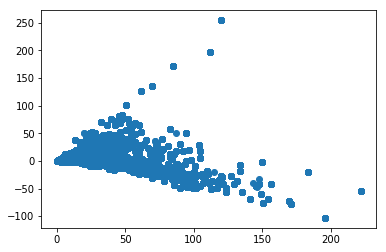

In [3]:
corpus = Corpus(corpus_dir)

count_vectorizer = CountVectorizer(stop_words='english')
bow = count_vectorizer.fit_transform(corpus)

t_svd = TruncatedSVD()
t_svd.fit(bow)
bow = t_svd.transform(bow)
x, y = ([_x for _x, _y in bow], [_y for _x, _y in bow])

plot_data_points(x, y)


## Truncated Singular Value Decomposition on TF-IDF

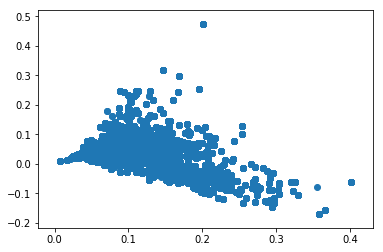

In [4]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)

tfidf_tsvd = t_svd.transform(tfidf)
x, y = ([_x for _x, _y in tfidf_tsvd], [_y for _x, _y in tfidf_tsvd])
plot_data_points(x, y)


## Document to topic distribution using Latent Dirichlet Allocation on TF-IDF

Running `Latent Dirichlet Allocation` with 150 clusters as per the results of [running Hierarchical Dirichlet Process analysis](../analysis/hdp.py).

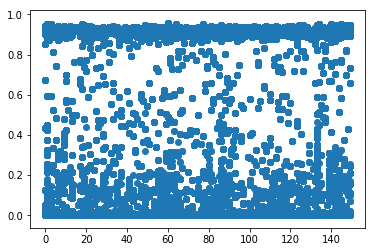

In [5]:
tfidf_lda = LatentDirichletAllocation(n_components=150, learning_method='batch')
tfidf_distrib = tfidf_lda.fit_transform(tfidf)

x, y, _ = get_data_points(tfidf_distrib)

plot_data_points(x, y)

## Document to topic distribution using Latent Dirichlet Allocation on Bag of Words

The negative values from `Bag of Words` need to be clipped in order to have a proper `Latent Dirichlet Allocation` model.

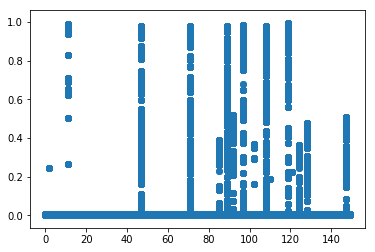

In [6]:
bow = bow.clip(min=0)

bow_lda = LatentDirichletAllocation(n_components=150, learning_method='batch')
bow_distrib = bow_lda.fit_transform(bow)

x, y, _ = get_data_points(bow_distrib)

plot_data_points(x, y)
